## Mount Google Drive in Colab

In [0]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

## Perform imports

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import json
from os import listdir

## Define helper functions to interpret file names of model logs

In [0]:
def get_architecture(str):
  map_dict = {
      'c': 'Conv2D',
      'mp': 'MaxPooling2D',
      'f': 'Flatten',
      'dr': 'Dropout',
      'd': 'Dense',
      'np': 'No Pretrain',
      'vgg16': 'VGG16'
  }
  return map_dict[str]

def get_model_name(model_code):
  return ' -> '.join(list(map(get_architecture, model_code.split('_'))))

## Load model logs from file and plot training-validation plots for each architecture

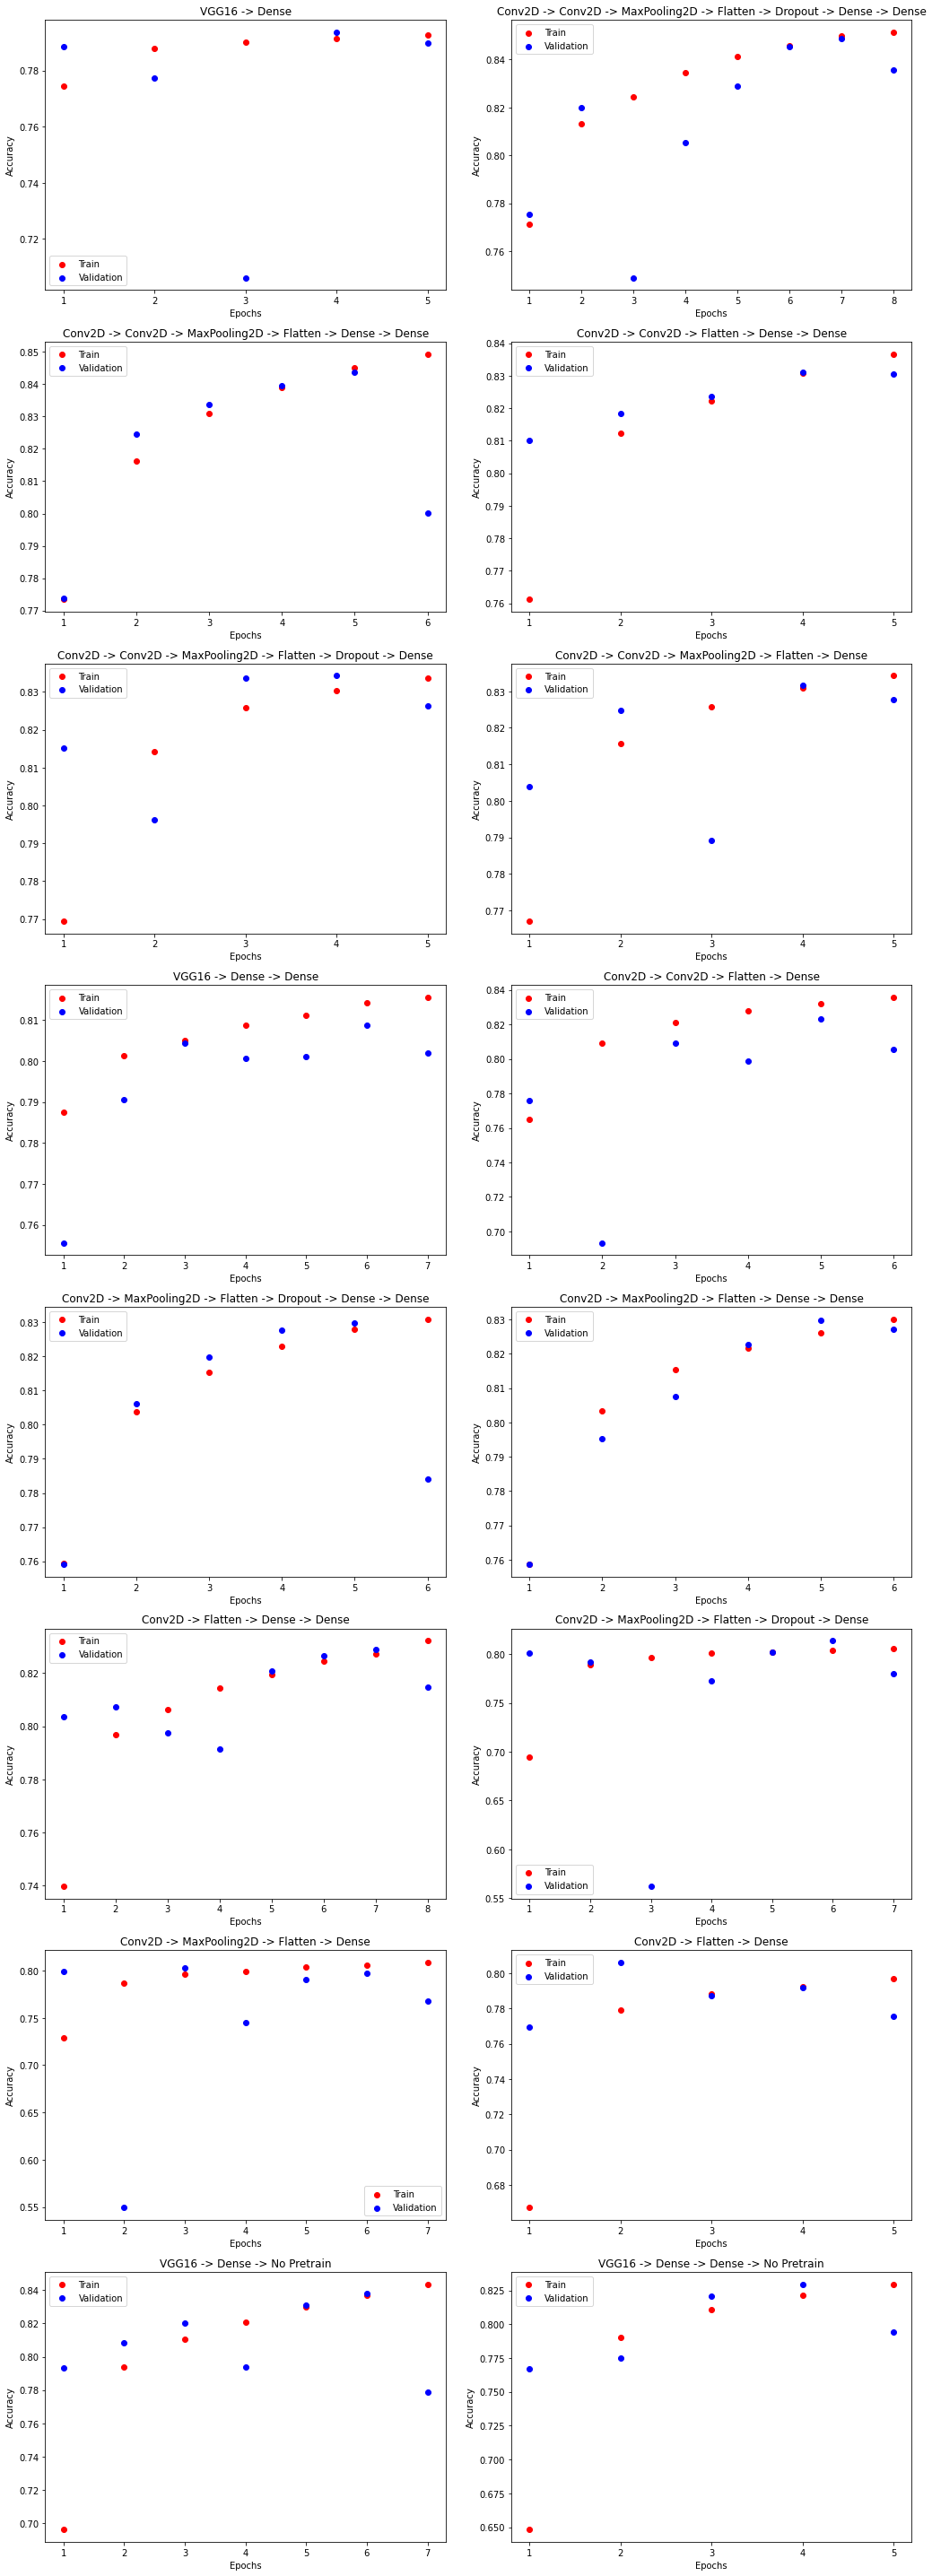

In [0]:
# directory from which to read model logs
path = '/content/drive/My Drive/Final Capstone/Model Logs/'

# create figure
plt.figure(figsize=(15, 40))
# count number of plots
num_figs = len(listdir(path))
# set number of columns in figure
fig_width = 2
# set number of rows in figure
if (num_figs % fig_width == 0):
  fig_height = num_figs // fig_width
else:
  fig_height = (num_figs // fig_width) + 1

# subplot counter
plot_count = 1
# create empty dictionary to store number of epochs for which to run each model
model_dict = {}

# loop through files in directory
for file in listdir(path):
  # extract model code from file name by taking everything before '.json'
  model_code = file.split('.')[0]
  # convert model code to model name by using helper function
  model_name = get_model_name(model_code)
  # load log for model
  with open(path + file) as f:
    results_dict = json.load(f)
  # create enumeration of epochs for plotting
  epoch_list = [x + 1 for x in range(len(results_dict['acc']))]
  # extract validation accuracy from model log
  val_acc_list = results_dict['val_acc']

  # find epoch of max validation accuracy
  if (len(val_acc_list) > 5):
    max_epoch = len(val_acc_list) - 1
  else:
    begin_index = len(val_acc_list) - 1
    while (True):
      if (val_acc_list[begin_index] >= val_acc_list[begin_index - 1]):
        max_epoch = begin_index + 1
        break
      else:
        begin_index -= 1
  # add number of epochs for max validation accuracy to dictionary
  model_dict[model_code] = max_epoch

  # plot training-validation plot for model
  plt.subplot(fig_height, fig_width, plot_count)
  plt.scatter(epoch_list, results_dict['acc'], c='r')
  plt.scatter(epoch_list, results_dict['val_acc'], c='b')
  plt.xticks(epoch_list)
  plt.xlabel('Epochs'), plt.ylabel('Accuracy'), plt.legend(['Train', 'Validation']), plt.title(model_name)

  plot_count += 1

plt.tight_layout()
plt.show()

In [0]:
# save number of epochs to run for each model to file
with open('/content/drive/My Drive/Final Capstone/model_epochs.json', 'w') as f:
  json.dump(model_dict, f)

All architectures demonstrate reasonable generalization at the best epochs.  The next step is to run each of these architectures for their best number of epochs in order to analyze the resulting accuracies, sensitivities, and specificities.